In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import joblib

In [5]:
data = pd.read_csv("D:\\Documents\\Data Science class\\MLA\\KNN\\KNN\\bangalore house price prediction OHE-data.csv", sep = ',')
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## EDA and Data Vizualisation

In [6]:
df = data.copy()
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(7120, 108)

In [8]:
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft', 'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move', 'location_Whitefield', 'location_Sarjapur  Road', 'location_Electronic City', 'location_Marathahalli', 'location_Raja Rajeshwari Nagar', 'location_Haralur Road', 'location_Hennur Road', 'location_Bannerghatta Road', 'location_Uttarahalli', 'location_Thanisandra', 'location_Electronic City Phase II', 'location_Hebbal', 'location_7th Phase JP Nagar', 'location_Yelahanka', 'location_Kanakpura Road', 'location_KR Puram', 'location_Sarjapur', 'location_Rajaji Nagar', 'location_Kasavanhalli', 'location_Bellandur', 'location_Begur Road', 'location_Banashankari', 'location_Kothanur', 'location_Hormavu', 'location_Harlur', 'location_Akshaya Nagar', 'location_Jakkur', 'location_Electronics City Phase 1', 'location_Varthur', 'location_Chandapura', 'location_HSR Layout', 'location_Hennur', 'location_Ra

In [9]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [10]:
df1 = df[['bath', 'balcony', 'total_sqft_int', 'bhk']]
df1.head()

,bath,balcony,total_sqft_int,bhk
0,3.0,2.0,1672.0,3
1,3.0,3.0,1750.0,3
2,3.0,2.0,1750.0,3
3,2.0,2.0,1250.0,2
4,2.0,2.0,1200.0,2


In [11]:
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df1.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            7120 non-null   float64
 1   balcony         7120 non-null   float64
 2   total_sqft_int  7120 non-null   float64
 3   bhk             7120 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 222.6 KB


In [12]:
df1.describe()

,bath,balcony,total_sqft_int,bhk
count,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,1479.729806,2.465169
std,0.876822,0.770583,913.779769,0.841520
min,1.000000,0.000000,350.000000,1.000000
25%,2.000000,1.000000,1100.000000,2.000000
50%,2.000000,2.000000,1255.000000,2.000000
75%,3.000000,2.000000,1640.250000,3.000000
max,9.000000,3.000000,30400.000000,9.000000


In [13]:
df1.corr()

,bath,balcony,total_sqft_int,bhk
bath,1.000000,0.283192,0.653435,0.882461
balcony,0.283192,1.000000,0.200648,0.269511
total_sqft_int,0.653435,0.200648,1.000000,0.647485
bhk,0.882461,0.269511,0.647485,1.000000


In [14]:
print("The skewness of the dataset is as follows - ")
print(df1.skew())

The skewness of the dataset is as follows - 
bath               1.796257
balcony            0.066610
total_sqft_int    11.464497
bhk                1.605694
dtype: float64


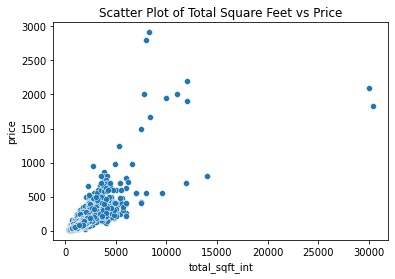

In [15]:
# Scatter plot between 'total_sqft_int' and 'price'
sns.scatterplot(x='total_sqft_int', y='price', data=df)
plt.title('Scatter Plot of Total Square Feet vs Price')
plt.savefig('scatter_plot.png')
plt.show()

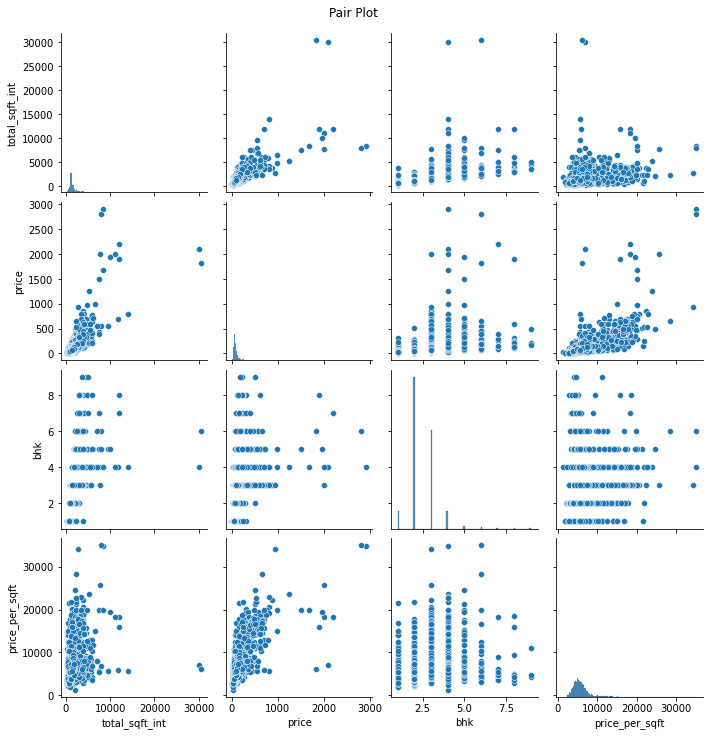

In [16]:
# Pair plot for selected columns
selected_columns = ['total_sqft_int', 'price', 'bhk', 'price_per_sqft']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot ', y=1.02)
plt.savefig('pair_plot.png')
plt.show()


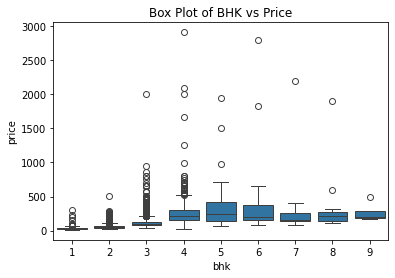

In [17]:
# Box plot for 'bhk' and 'price'
sns.boxplot(x='bhk', y='price', data=df)
plt.title('Box Plot of BHK vs Price')
plt.savefig('box_plot.png')
plt.show()


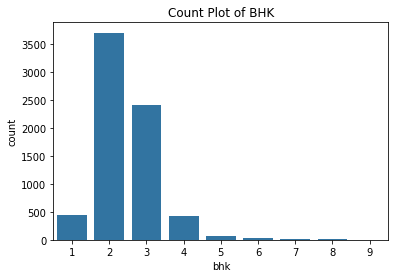

In [18]:
# Count plot for 'bhk'
sns.countplot(x='bhk', data=df)
plt.title('Count Plot of BHK')
plt.savefig('count_plot.png')
plt.show()


## Model Building

## KNeighborsRegressor Model

In [19]:
X = df[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move', 'location_Whitefield', 'location_Sarjapur  Road', 'location_Electronic City', 'location_Marathahalli', 'location_Raja Rajeshwari Nagar', 'location_Haralur Road', 'location_Hennur Road', 'location_Bannerghatta Road', 'location_Uttarahalli', 'location_Thanisandra', 'location_Electronic City Phase II', 'location_Hebbal', 'location_7th Phase JP Nagar', 'location_Yelahanka', 'location_Kanakpura Road', 'location_KR Puram', 'location_Sarjapur', 'location_Rajaji Nagar', 'location_Kasavanhalli', 'location_Bellandur', 'location_Begur Road', 'location_Banashankari', 'location_Kothanur', 'location_Hormavu', 'location_Harlur', 'location_Akshaya Nagar', 'location_Jakkur', 'location_Electronics City Phase 1', 'location_Varthur', 'location_Chandapura', 'location_HSR Layout', 'location_Hennur', 'location_Ramamurthy Nagar', 'location_Ramagondanahalli', 'location_Kaggadasapura', 'location_Kundalahalli', 'location_Koramangala', 'location_Hulimavu', 'location_Budigere', 'location_Hoodi', 'location_Malleshwaram', 'location_Hegde Nagar', 'location_8th Phase JP Nagar', 'location_Gottigere', 'location_JP Nagar', 'location_Yeshwanthpur', 'location_Channasandra', 'location_Bisuvanahalli', 'location_Vittasandra', 'location_Indira Nagar', 'location_Vijayanagar', 'location_Kengeri', 'location_Brookefield', 'location_Sahakara Nagar', 'location_Hosa Road', 'location_Old Airport Road', 'location_Bommasandra', 'location_Balagere', 'location_Green Glen Layout', 'location_Old Madras Road', 'location_Rachenahalli', 'location_Panathur', 'location_Kudlu Gate', 'location_Thigalarapalya', 'location_Ambedkar Nagar', 'location_Jigani', 'location_Yelahanka New Town', 'location_Talaghattapura', 'location_Mysore Road', 'location_Kadugodi', 'location_Frazer Town', 'location_Dodda Nekkundi', 'location_Devanahalli', 'location_Kanakapura', 'location_Attibele', 'location_Anekal', 'location_Lakshminarayana Pura', 'location_Nagarbhavi', 'location_Ananth Nagar', 'location_5th Phase JP Nagar', 'location_TC Palaya', 'location_CV Raman Nagar', 'location_Kengeri Satellite Town', 'location_Kudlu', 'location_Jalahalli', 'location_Subramanyapura', 'location_Bhoganhalli', 'location_Doddathoguru', 'location_Kalena Agrahara', 'location_Horamavu Agara', 'location_Vidyaranyapura', 'location_BTM 2nd Stage', 'location_Hebbal Kempapura', 'location_Hosur Road', 'location_Horamavu Banaswadi', 'location_Domlur', 'location_Mahadevpura', 'location_Tumkur Road']]

In [20]:
y= df['price_per_sqft']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=589)

X_train.shape,X_test.shape

((5696, 107), (1424, 107))

In [22]:
from math import sqrt  ##### Standard method to select K
sqrt(data.shape[0])  

84.38009243891595

In [23]:
clf = KNeighborsRegressor(n_neighbors=1)
clf

KNeighborsRegressor(n_neighbors=1)

In [24]:
clf_train = clf.fit(X_train,y_train)
clf_train

KNeighborsRegressor(n_neighbors=1)

In [25]:
pred = clf_train.predict(X_test)
pred

array([4857.14285714, 4333.33333333, 6076.13469985, ..., 2922.37442922,
       5250.17277125, 4500.45248869])

In [29]:
print("The accuracy of the KNeighborsRegressor model is,")
round(r2_score(y_test,pred),2)


The accuracy of the KNeighborsRegressor model is,


0.98